https://www.tensorflow.org/tutorials/generative/style_transfer

## style transfer
- 예전에는 딥러닝 사용x
- 가장자리 등을 catch하고 texture 유사도(selective search)
    - convolution이 패턴과 모양, 특징 찾는데 쓰이면서 가능
- GAN은 학습이 잘 안되지만 이건 잘 안됨

A Neural Algorithm of Artistic Style

- hierarchy하고 downsampling 
- vgg구조(간단해서)

![HELLO](conv_transfer.PNG)

1. content reconsturction : content가 어디있는가와 패턴을 찾아 합성
    - higer level layer에서 기존의 정보를 잃어버리고 재구성함
    
2. style reconsturction

.

- local image structure : size증가 -> 적절하게 줄이는 tech

- loss와 학습전략
![HELLO](transfer_loss.PNG)

- 전통적인 방법 + 학습 전략

In [1]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


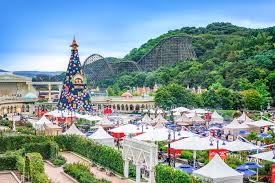

16384/14979 [================================] - 0s 0s/step


In [23]:
content_path = tf.keras.utils.get_file('new.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUTExIVFhUVGBUYGBYXGBoWGRoXGhggGiAXGBgbHSghIB0lGxgXJTIhJykrLi4uGCIzODMtNygtLisBCgoKDg0OGhAQGzImICYtLS8yLS0tLy0tLS0tLy0tLS0tLy0tLS0tLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQMGAAIHAf/EAEMQAAIBAgQEBAMEBwYFBQEAAAECEQMhAAQSMQUiQVEGE2FxMoGRFCNCoQdSYrHB0fAzU4KS4fEVJENyohZEc8LSF//EABoBAAMBAQEBAAAAAAAAAAAAAAECAwQABQb/xAAxEQACAgEDAwIEBQMFAAAAAAABAgARAxIhMQQTQVFhIpGh8DJxgbHhFFLxBSNCo9H/2gAMAwEAAhEDEQA/AJox7pxsBjcLj7CfMyPTjNGJguNxTwLnQcJjYJggU8bClgaoagwTGwTBQpY2FLA1Tqgop42FPBQpY3FLA1Q1AxSxt5eCxSx75WBrnVA/Kx75WC/Kx75WBrh0wI0seeVg3y8Z5eDrg0wHysZ5eDvKx75OO1ztMA0Y9CYO8nHoy2O7gnaTAhTx75WDxlMbjKYU5BDoMXClj3ycMhlsbjK+mFOURtBivyMYKGGv2X0x6Mtgd0Q9uKxl8e/Z8NRlsYcv6YXuw9uKxl8e/ZsMTSxqUx3ch0QH7Nj37NgzTjYDHazDoga5bG4y2CgMbRhS5jBBBvIxmCce4GoxtIlYUYlVcaouCEXG0mY54qYkVMbomJlp4mWjASJaeN1pYnWniZKeJl44WDLSxuKWC1pYkWliZyRwkDFLHvl4NFHGeThe5G7cC0Y90YM8rHnlY7XO0GBlMalcGNTxGaeCGilYNpxuKeJRSxIlHBLztEgFLG4oYMSliZaeJHLGGOApljidcrgtRjYHEzkMcIIOuVxt9nwRqwnreJcsoJNZbdpM/wDaYg/I4mclcmNpEYeTjYU8VjiHjekKYNJGZ2MAOCoH7RiZG2EdPx/mC5GiiQAepCg/92qTtEQJxPvr6w0J0Mp6Y88v0xR8p4+dZR1pvVa9MrqRQItq1b3HfEeZ8f1WpugREfSYcEjTPW8xbY+x64HfEOmXXOZylSjzKipMxJgmBNh7YFbj2UAJNdIBjr2mYiYjrt03xyk1Kt5R6mqS0Ax6Qeu0AzPtiIAyV8hyAJjWSp2Mm8W/7h1xP+oMIWdhXiOWLaBXpljAADC5NgAepwY2SxxNc4EgSUuSAoB9b3a/zGHvCvGmYU8lZqgEArUXVAHaJPXv9IAxw6ojmHT7TqCcOnriGpkSDiqZX9INUMA9FXHXQGQgTFpmT/U9cMqP6QaNw9J1IJmCrW6G5HTft64cdV5ucVWNjlT2xqcse2E7fpFowSKNU2kA6QdpvLWgiOvfCbiX6USI8qgo2u5LCIJgxp6R3gfk46oQaVlw+yt2xmOf/wD9BzZvrQTeNKwJ6CRMe+PcJ/W+0Hwx1TXBCJjSkMF0kx7bGYAJ7Tp4ISnjemmCUTGZnl1WQrSxKtLBCJiZFxBsksEEFFI9sbhD2wciYlFI4kcsoMcXQcRUn1Fv2Wj8gf44N4hVNNC+hnj8KLqY+wGKV4T4vUOYqIaDgVTr1A6irSfjX8AN/oPTEW6gKyr6/f7yydPqRmvj7/aW4Jjby8Smmca+WcX1SFSI08aGjgjysZ5OODQaYKKWJETE4y+Nloe+OLiDTI1GJAuJBSGF/iDjFPJ09bgsSbKIk+pPQAdcSZwIareF1qiopZ2CqNyxAH1OFXFPEuWoj4xUa8LTIbp1OwHriicc4zUzuksqQoJVVY6RJ2M7tFpiMJqxaYN3uCCV0qIkEsRv2AtsTbGNuoYtpWAEsaWWPP8AizMVJlxQEfCGgkE2NuYG28j9+K9SzC/hJAm7SVVpHYqzbegucR5SgCNUzseu8RqMQZn8j64INJTub8swpNot/tvfEygP4rM0DEvmeCv+qinbeSfUSyen++IatCgxU1KBv+qbGO6wB87G3pifK5JYn1AspgS53BPp7DBC5LUASYIBJkdZNo94t64OlRxKaBBUp5VdI1uDcQFsY3hidva+JaqUV51pTqgTJJJBIgrJgg2wEieVZvMWZljzfuj87xbEFWu1KWIBB6mACO7QT9MQIJ8n5yY/KE+ajEclRSx3QxJsJ5vT+OJDlUUyVqXndgB6xabxOADxWpVEaQWadB/aFrWg74LfKqtMLUkVAJEmdLH1APaL4aivMB2nicGy4uEYyRaZn6x32waMlIgMyntyCPpgVU02puNQGzWBMRuPXrHpjMw6KBMOw0g7gE7kzM97e2+IFyTzDc1zNKqvL5iNB5uUzcT1EbA9tsANki4B1hXuFVvhLHeYlhvvEDSZ6R6uaILETpMDoLSbX9vzxHUatXIsYYgA7Ab79O94jfFAzCTazD0VKSIJBemb9ZJ+KOkbQesDGZrKisGL1lp0ydzBkb3EggA26zgR+F1oEOhB3YEFY6wd53/1tO3EMnSZZXTI1Tqeb2AHw/DI27DriN77GNVbRMtfs7EXg6dx069se4d8P4DkqtNXatVVjMjlsQSLSNrW9MZip6rGDRv5SoxWOf2nTaWWODKWWOC6NDBtKhj6V88wLigVPKnE65c4Y06GCUo4ytnmlcMVpQOJ0oHDRKWJlp4g2eWGGLEonEoQ4YhMbaRiRyx+1EPFnK0qh1aIRzqkDTynmk2t62xzfwDWq+clSpVYipUrLBKnWoBAJ0rsrBRJO7AAGZxf/wBIGb8vKMFZlaodAKrrbYsQF6yFI9JnpjkWRza06lCvSrGQQXBIV2AY1XNQ69Nylh+LltOGUK+5HE4ntjnnb7/L32ncEM9MBZ/i9CiwSo4DnZACzdL6RJi4vtjTj/Giq06dE89aCrRIVJEv7wwgHecVmrnaGVuTLfihi1Rm5CS5+u56x8JIC6/aDQB5luyedpVSQjgkXK7MB3Km/Q/TBP2bHK8/4ieoQ1OmqFfhc62cG4s0iN9r9jPXWv4mzLgMcy6iTI1BRI9oH0Ptvghmkzp8C51f7L64gzTrSUu7hVG5P9b+mOcZbxZmE+LMCDYByrjfcHff1NsLuN+JTmQoq1IUbAI4v3A8u5taT8hhe4YDVbCM/GXiE1KhpI0opECDpJMGXIkRY74r1biUVQWU1CAoEqxChRACgD39ycCZmk1UfcVUJAPLzKSCJ3Yduk4W0g1NiDIcwCBHICD16tb5fPEzjL/ikjiYmzHObzhlgoGqLiBCWm0gc3YW3wJS1KjDVAbSJkA7XJP8++IqNIQCD+G45J+G9z/V/liWoxYrJI9dQnY7x7fnhtAUUJoRQIQhgi/ReUknZe0E9euNXAa6x0EQ42jt1x6jkHTJMaB8f7OxtjCsCZiwmS0D64EeTcPpcpBXbezR8RE3M9sE1lnZokg7MLNYn66foO2BMsTBGiZmTNlIaRMne3++CSKhY+WytAhQdUEk/FJFxfbYaR64m2VR5g1qJXOMMF0lhOsXG4DKYIFwQPXqZxFw67SdRpiOQiPlubXmf9cWTjWVLqpFFdS3MOSQyzsIvct674W0lLwr8oBh2OoX3ssSTEWA6ibYXvKy7SZIvaZlBTDavLVYuCYYbWNx+7G9XMGo2kDSLtqJkQOo+uJOI01orrC+baDJkARM6bRt2JFvWA0bzR92rKFHNphhfaLmPnHzxLZt5w9TJMqq1KnLdbam1Rb2iZt19cE08jTYKWR25obS06bwGEDtMz2+u2T4bXp09KoGJu3MCV9DqgDbYTcd7YAZa+pebRJaRaQAPiKg37WuPlhK1HYx7XTtPeIZrytPkroUcpkhj8VmIaOs3FrHthflmptVYvrZhDSBpYnfTY7HtHX1ux/4YSxVn1Kba1AAWe7EsTO39HDCpl1RgVqFSsjQskaoN4MSb7/74a0UcyBNSClkCqaQlQEkmCGEyQeYgWAm8X3jGoyC1AGdNUxAh0TVBkkSelpaBt3uOeJFDza2AJliYJb52Anr+fbzNotYFRU0vsCLiPUtv6mBv8jQCpJncmjNqPCBFqdr7IpG/QkSffGYSHidX++q2ty00K2tYnf3xmFIf7uP229Z3nI8eytTasqns/Ifzt9MOUrUwJ1pHfUI+s4rSZ8t/wBSksX3n6/64gz7iqAr6CAZBRtJ237fXG89Qp9amkYyJbhxKgN61L/Ov88SLxbL/wB/S/zr/PHOhwtDtVdfcq35g48bg9UQUqAj3g/SP44cHA3/ACik5R/xnS6fFaBMCtTJ/wC9f54KXNJ+uv1GOIV+NQoNOoCZIaVFu1+o+WIn47VptDaD9LjuIGx6HHNix3s0K5Xq6neDXX9YfUYibPU/7xP8w/njjQ8SAQDTUsQpnYCR1P8ADAuc43VqAIVVQYHLKyexJP1Fvc4U4V8G5xzsBZEsf6WeIy1JQKhCpU0tSgjzaggKfTQrTF4YYobV6q+WzKA9Cmj0gtMNNLVJaowMwLGG7xbBa0yTRrmtUVHqmmEpKSVIUqXS8TaDb8R3G9j4T4eyuVQtmKjFqkiwZiFkrsoMKSOu/WdhM5kRaO5+7lVV24NX/Fff5RTmqtaQKrQQlNQqmwSA2kR6FevQGcQVAAuoEnpsbQPT+re4xYeIcMUDUGFSloplWFhoWV3FyY3mdvliv1XVPhFz73vMEk95v6elzicOvvJ5FpyJBpLCF+o1W+ZPrv8A6HE2WGm36wAMdD3/ADj6emI6bCPU+nf0nsR/scZUkiVDCepW0ehn3wzQDaCZhdM/EWG23cDuZufTAYy7OpN7XIMHv1g4ZgkkkiDZfi6yIkdRYbemDqeTUrDVG7AIAoBA2Wd4i+InIFky48RLRSWOmdQBmN7Hpy72J+U98Ma1AlQ+i+5WBvsYt6yPcjpiV2KkBKpAnm1iGJ/ZHU36GB7Y9qcedCRGlQRsdX1b0O0RuMDuknYQ9yDVBpYKahQwIsBAiL+5+X78E0siQdb6qarEsbyCsWtv0/1wyyPFVCeYYBaCQJEjpqJ6neBvM4FrcSFRuQrAB0ymoAz3MAR2mDhHyt4EGs1BXrU78pWY2dWkRAK32NvecePTR0B860nUosx9JiVI29JwFxbira4YcggEHYjoTBk+kneMR5fzHI06dBGoRJYTcyo3v19R2nGclqviKbMl4lXC1BpWdtIA/F21Cb/KLY9FOtOquXpUwLhSNRI/DBPqelsTZXPrTVlHmLcktEav2haZ7dpHzCrHmDKuwJE3i+5nrpHrvjgGIqowXaN6+YMHy1aSOXUqsqGewHLaf4YW577RUYsRdY6gGAex27xjRs3A+GzCCdU8vQD07emNhnmZgINwbGZtYHlIJkmP9MDHi0bmEAjmbcLy1ZqhimSo30qCtxMCLHrvbBASmvM002DSJsWKxcqDH8/THtPilcHy2dqV+UgLECBAg7mRb+GIONUWqU2ZWqTB0hoGsgbAAC2w/dgFiTvsPaA0TIq/F5CIukTYMbSQIJkQB9MRMvKIZBM87Ssj09PUxtiHKXoIAt4JIZTb/CCb9LgdcaVMpWZlMOV6ERCjsJupt0HzxSgNhtKUBNaRaBNQKCQD5ZUyJkSZHb1mbYLVFJOgLTBF5jXdrsRqmF9fltjSrwV11wtwss7KKlTaZAJNthb6nCrM5sOQqaqknlERqge0j5TYbjAsN+EwG/Ef0+DGodVJ9Z2ZpY6bHYEySe/YYr/FMnVTYCrO8AB5HcASD079zOJcrmqqU35HDKJOqnzaOkzBiZv1g9sFZaoyvrr6dbAHy9JkGLMVtMgjrAveTiYd0Js3+8U0BZEU08hXYBhTibxMR7g9cZhuPEIFlWmANuUj8ox7gd3P/aJPuH+2Wn7Vm/70/wCSn/8Aj+oxi5vOf3x/yU//AMYbtReYAJvFhPrFvTEqqiiXYCQT12ETt7jFQ9mp6hx1FAzOa0A+cxJH93TF5AI+DaSdsO+B5p3pstRNTp8TQg1amMCy2gW9cE5SjSkLMtzSpn4hBYX2gsO3p1wy4bwluZhCq0b9YM47S97QFlA3nPa75SkzK/D2WDH9obx/i/qRiTL8TyLQoyfpepHy39T9cWzxbwanoNWovMisRGxgTHz2+eK4vkt/7TNlTsZMf5vLtjTqY+PrJhPSGcTo5Oiyj7GW1KrD7wjcTsW/qcTZrKZY5apWGXCwh5tZZhA2AO52AEjEvEcgjsmrLZipFKnDCroVViyliI1AASZvbA+fZKWUSmq6Eq1iCKjrXGgJLFSguOWAP1juOgxljW85kokVtKXn2q0NJSpqVQGp1gYkFBTKqskAAttE9cWTI8YzFRBWTLkodG1YINdNiZ0aZBmxExHXAXGOGvUWlSDCVKkBlVdTEBRCTdQNZLRp5YEzgM5LM5jMkV/Mp6iy61VgmpELDTspkL898VyIrrb1te+/H5Sjf7WT4AdwPn5+zG2Yz9YhqLZVlNXW8tVV4ViJKxuAzi29yehOAtGhSppgWPNIJOq0fuO19IwwyOVTKKxqRU06mWrqLMnMFFMEiFqk6rdQDGwGG+VOXFOAtMs5DU1amzyjCx1TY7iANwOpwiqasDb9/fmQyBS1na5S6yMhUONGpZAiTBEqSR0j9+BqeXdizI8qoEt8IAPpe8Dvi8Z+mcxpYlQVAWwdRAE3ld4nAWfq+UtIrG7hoJgwfivfYgH29cDI7ImoDeZjjW+YmoUylMsWOoKPhuIsbdz1+fbAiVzUPLpGo/jKrzd1Bj22v77N/wDrLpB0MANU+gPSSD7wDOG3BPClIqGJC02M8w5mE3AIuFPS49jY4zDOCa5J/aHFhdzSi5Uq+Wr/ANmtH4V1eYt7CJdSojSJvHcYFGRq6gkPzlYMESHi5vA+IbXx0puH0ssyxpVNLqCJYFSQdILSZA1WN7zguhXRvLNMyFSdwLKLXNp+WGPUKpoczQnSgkhjU5lxGlUQMNDBV0rLBgurYKCZB2OHHC/D7Plkq3TnJgAk6SsajeIJDbXvi68cyyJTfzV5WcGCJXo28d57YrnHeJijRp0lemlNY+BYeRsBMBRMzJwHzhfhrf0gZMa3RuV3iPBX/s9QfSVIiFME3NrQDuOsk4Op5anTUSwViQvKkEG51H9npEzvfELZum4AJYIf2pMsIDg9LdVMRG2xUcTqGmxioQTDXg3Hbm5gTHrY+uM+p8m3EjxxGFfIszFvM8xeUhQAXMdwO1/bAPEqtRqOvRANTySGSDqKF+lxYAnGmUzsmRpJsedgCYIOqdu9ielsWTI8UZwqMQEBANOA0dAbxsLdTi6MU/HxCrDzK9leFVKpSkpbVpLLTgCQb2MWEQdp94xrmXegSBYqdJckGQJkAkEDt8hc46Bl8zRqVkrhgSlNkUmGbrpA/wA2/ttOFvF+KZbzatNaNJvMJUkrpOl94YQdQBsR736c2dNhz7SrIoFlol4dwTUvmVgaSHSU+EmYJhhYg2Gxnm94M4rT5PMosWK8sE/EAILQQLz0FvpgEcWghP8A24eNDatognVYk2B1XI39MbZ/jLUxFNDTpCACpMw1uWJ69fXGV9eoHn9pmK3vf6RDTru9Q0wG1/ik8qzeWk4PrZ0iqqmCoAGpgNOm8wovFjF7Rgng3H1qPFVDUUSeYDlUfiJ6mDudoOJDksozNGpQzagRoIgdFAJ1A/Mi2NGsHZhX3zKcipq2eUVGh2RI3jltF1nmHQxJub4W/YaGvzkbW4jkLD45nUSNNtrLb6yLIOE5NlLSaigg2IETaAEIn91jGNK9PL6VUopXc2AWJjuSDMdBv6Y8851QkLfpCcLAbkRLSoNUOmodCDUOUhWUwYIBvN7QBE73wg48tQPDw1JJFI2+IqBI/Fc9+3WMXTO5Z/jRSVKte+pTIBsDc/DeOk3viteI+GDTq87RPN5OssCQI1LcxE9YvMDF+ndSwI+/5mdLD6TK09QTHnaYtAVoEW7Y8xM5RjISZ6wP54zHo7TTX3tO/ZjPKlvOoU7yJZCfXlBEH64D/wCIrY/aaRuSdFN9oiLT6/l2wTQRwKrU6NNadNZVdIDESRG28L+eFy8QzJV7osZem2wPOblrabke3S3fP3J6GianilCnzaoIBlly9X5mfL69TOIV8bUZtXqEruBTe1+oK26Ya+JHanldfnDnkE3t+IwZHYjpE4A4c5bNlPMUzRJenptI0w28SbmekximPIxFiSy4QasTytxc5qg+hatZSSNJVUAKm8zextYXIjCbheWqUWZ6dIUiw0gs6AgWM6WJkSOkHf0w84wQpKoxhvLBChYBZ9Lc0yGg/KBiuiq/nVU1VB8KneFJbTJixgKpbTtJ6zgsL5MYY8oX4Rt7CW3jmcYU18qpTqMVVCvmU9Nt3a63I7H5YpnG62YhIELlw4byjqCCtNi0tJKKbjbViz8GyGYkhaZckhQ2pmRdKkzqnuQLk/lgTOeGq61KtPyKjU6rIGZCHcwA5QMYEWMahYd5xfBtwOP8H6SLsSLuvv8A9la4Pxry6bU2OnSpC8v3jKwOpZO40gAbRy+kNspXNQM6qq6kDU6UmsiKFKlfI06ixm2kQoM7DBmb4JXphKrDWaqt9oqoR5hSpp5QJKCF089oEm3Xzyyhpll0rlFemp1nUzMiorhQqsQQJgETMA2xUgB9Y4PO/G3ge5AlA50Kp8be5s+T7C/veKs7wqq1RaDMFU0pXQXNOs1PchbDVf2EYtHhDO0xlUDIVIjeLggNIk/DeR2nCzjGWqs6kUyCFWm0U2Y0lL/2lIUyOYg6W03PpMYi4WyS71KTBJLqtM1NKaOUfd6lgHU5G45iLkYVryLd7Dx7yfbrJuN/z8S7JxOkBYD60x/98AVM9LQEBCiQQyMZJggID/8AYfwwBTyJNao4YCk66I13stMAQCQLgi0Gw98IaGahlBzVaA9HmvpjUS34tUQFBJLbWHQ5WryZrwdLkzXoW6l+VqRv5L++kfX48YKdAEN5ThgZBFNZ+uqYxVeLZDNaKio+txmBVQTB0aTAYmOmnr+eNeJZfNj7WVDtqem9OCOYqZ3HTb5KMAqwkl24lsotQUkim8mZ+7Pcnoe5P1x5mszQZSppVCpj/pE7bRfFS+05mlna9R2IpMgCEmzP5dkAJMHXYQOpnAnBXzNbLMHq6NdamourSSeh1gRqF9/347S/N/Sc1cmXOrxVPw5esfQoq9N+Z74oPjOs719RpRYQGjkEmDpViN+pnba2LpRydVayq9RS1RgyjWCCFphW1EdbC3WbdYBznhl61c03U+YacgE2AQx5hbrqIAiB1i+AUZiNUjkQMKWc5zQXUjkMNlNgAoPQnUO5uRMzOJsw9NU3puhMkhZgj8MsSYMyGBtt1nFh4n4azC1XRqQqAJLCmpkQoIC3Y8x0y1xf0jE3AfDIupenROslhUqLq0BlBEAXtquRHOPfDrjEy9t9RWUVaSrLCQLwSpIImQ2r6bd8HUc3riIYR0gGRbsNQ+GN/wApPUKH6PcqqnXmKhkTIKognm2IPSNzEfkpzHgYyTRrU8yuon8OpQeg3W0TMjfbDsmqN2mlOy/FGowCYJPxAC+3VSfSSQJ+VtuIuSx5l0uDLTBA3AsZOr89B9ZuOY/Ro9UaDURRCGDzMO5tIIJDRJt6xhdn/wBGteAHfzAurRoBJ2kBoUQLb3j54h/T73AcbcSnVqjENpqeUVYFaZBB94H4rtcj+eIzngyzpbWgmWA733E6Ta1ri+HB8H1fMUI4LNMK2olgAQLMAQLSJHXHnEfDNR0MXaJEstzItOoRsehFhihCj8RG0UCJcnxAOxW1NmuWCAqb3Diet+vXHrMIdarqjDUaeklCFDWCkCLqFg9PyxJlvDmaDAmkIFoDJEdCYcCbD8uuIaXhPONUYiixhWbVyXAiCwDNE3EAmI+eJDt6qDD5iMgs0IfR4whpaU1MwWSWVS5DWJJUbiT9T64FXPKdQIWRILEMO/UEETO5DewwTw3hTuhC1VIVioCgBgDBZDcXAI3NsLKvCs0T/ZDlk65X3B1at52teRib4N7jsp4jDh9ckFFnyzAZZt/5AR89yfbBIrUWQsKNOFIRiaAcHVy8z2Gw/f6YWZLIVgXFWkQXgK7qAoOsEgNsJUnobDDThXDIoVqNXL1vNqGmeXm0091ZyHBE/eAbDfcbsnT72ZNcRLXK5Wzq0mKI6aVJAsdp9JH54zDkeCQblK5meqjGY1UJo7Q9pdq/G6jLTzEijlzAzBYlpip8KhecKVY3i0i9r2t+EKwULSpAMFM6Q8qhUqLkSItfYG29ueZ3hefpS32dzJMwykafQsAQTAtff0ksvDOYqNUqgVGDihWHl6nAVxaALEEBWG34Y74gGogVLK13cc8VVsk9M+c9QVHIFMhSByosIDPaYE9bd2A4g7qPLSowEhppMNJjaFUsAOYHlmRijZv7T5gYq7gCCKhi3Yc21htH8ME5HxRVyrgFNyS3KSX3MsQIJjr7fNu4h8QtQF3GWZybIDo0DVUDtOvUWLyfiA3kzPYCBc4fZfgeYo0TWUU6lbUWCVVZlRD0VVIhrkn06WjDzL59TocUwwZVMyRDE9vSO0iMaVfEMVVGjkOsE78wIvYTb0/W9MMET8Urj6jIo0rx6evmoqp+MvLMVwllYlUBBGm0QSexj0642z/i6iXNNFKVFdWJYogaCPxauqHr0t6YN4jwvzGFWilBXkklkLKZAliARzyqX9MVPxXw11q1KjUQtPl5wsgytzqkDp+KIgRM25dQoA3KDtHUXFbePB28fOWDO+LKL0vMWnWM0qsQKYABtPMZJ5TEdJ743HGcrVY069FgKgUqWvssTqX4bRscVkZ1KsZaigJamRS0yF+JgSWMTAUkgAC9rY08SZU0ClMsNLgFKhVmYuoJZSAT0k7bD0MqMjiyRJ5+yE+EfP8AOWnhWU4dUq+bTrMS4ChS2hYA2AIBJgdzthjW8MSZSqRaJZVZj1LWAGokC99zjmuqlTUBXpkpNzrUCRJEeWSZ1fmMN+FjMZgUGpeaKakyQwNMjUOsgGAD0+RnFNbVZH1ExrYHEtma8OOsywdNesAwum0RET1NwZ9MKsx4ey9MgEBRE6imqYbYmQLW9Ob5Yb0EOXSRROmSajawx266gLSfQDAua8RZVl0VCpBizOlz0uNr9cG1veasbZEB0Ei/QzQcMoGCCSJktoENIgwwbfue2+N//TGXYSCwj8I1qQYiLQRbviDLV/N0DLqNAqhjpMWmNGkEyBJOqIttiwZLJVlJ5UAY6t4j9kAAz7yu+2GYgyWkrKbnPCVIsTU+AAlVNSsXEdQWf22HbCujwmmxWnlHaSSEU1HqKBck6GAUd9U97XtauIeCqrlm+0CoHZGZKi2JQQLnV2Xp0xvw7I1aVMA06dMU3RV0oC2sjRqk99UegO/Q0rbxJhFJ4/WK6vhUUWpulSqBTDeawZi7DS0MN5IY7RcR2wTlclUNXzvOqeSaKDzGedayfu7idJ5SfUwNzh15eYl0Cq2gATOkyb3UH4T7z74CylTMOzGqoprAAQgaiQTzGCTAnvcj0vErUso8xDx3KVqddGJrVEZidWtpiARSLXgTqtEbdRgThvEtWfOmlSB0FQKksIkPqkn4gTFhtGLFxvOVaaEqqurEJzINPMCNLGDEEC5EHUBbFSKmlWpuxCaNWladNmBEGIqCmp0zsDiqYWYEj5STmmG/0l04xlWzYpmoqhUbVt8Uj4bk21afpHU4mydOhSg/ZyahMcgBF76oLBV9cI8jxt2inVTMa4ktKKpK3MaisAQTB6DrgPPeJnVnFNMwTT+MVPKphQeoYtcbehF5xM2DxLqNuZbq51VNQkKViFdknqDKn+djio8Zz+Yl0/5hNLSs1WbWpIUkFCvKAZ6jofSPL8XzCqoGpmdVYgVFYA7aZD+kSJHpbG656pUrIlVkamGOrTULm4OkGD1kXtsIkbFkYCzDiYBwRvXiMfBOaVlZquvWp8tWbW0gKJImwn07Yk8RcHVg9WhU0uQToaQhMyWAizRPzM2wNw+rVRVXL5YOAgJcmxYgDUJBnvBMxa0Y8TjVZqgy9SnSDOpBIDgybRpjqJvcWxQYmqRzMuViePupVWyxcrFQliBILAgx26g/XEtLw5nsxV8xSUQ6lUSQoVbXAmxib33gWxccn4Jpl9bBQJMqoALdJlTYH64sOb4WHp+WOUQApAHLAgQCIttHbGc4VB2i4kCiV6p4ZVaCUw33hqa/Ngj70ITqj/Ao+U4pec4aadQipl9DliQzDUtRrkMDPMD3AkdYNsdPyXCjRUksajm5LHQsxB0i+kH57xhfW4llmOmvRI6EMwZbGbiQD9MB0B81LGytCUzhE0hVXQqh6QNQpR1Ko1Ab6xqgN6QJPofKprVmp1aT0qtAFlfVqKaSAAWjmU3sOU77jfoKcWyVJQFekimQFVY2GwVRNh6YXV+K5MuqpQqeZUgqadPynbYarlSQA25EQcTOKgLaR7Tcngc7SqrwOjUl3pVXLFjqSnVVSJMaQoiIjbGYveT4ZCLFEgdnRVa9+YIwWZ7DGY0HXK/7fkSkZLiuZqj+10sAyaSemsX6XhY9ZxNw9K1N3qHQWIKMSCSUBsguIFhe8Y51S41UAChyCWLTJ3JEG8wbbf0MOaq6yAzEkTEgLEwd59D/ALYxbg35kTkMuFfh9RXlGDNb7sjSotBAJc6xG8i+qPUjK+YJIakfhM6GUAqDOkHaYm25nrinpnCWHmtaek39QegMb+vywfRqVPNVlWpEWBuCoBjeRMXB77jEilb1FDb+ktnC86VNRFFVQFRtLSZbmDEzciIttcemGVPPvVYoxIALvsFg9DM9tXyxSGqV/h01DBgTzECYnaSPX033wRl/MHKbKCGvBuCTOkmwub2/kDkYDmOuaq2nQOHhWMM4uFO4NyYP0gzgLPUKdWky+dSR2Z1DMFACioVBlRNwN++Kw+WZkY0ijagpkEzIYWkSdPKp9/riuPmW5laZEjQ1jHUHr/p2w2Jy29SjdSw4E7HwlsrlkA81WZFCGoABIgsAsWixEdx7YMq5nK11ZGdSoI3tzA2KT1BHTHFaPFKmkKNXwsN76TeGBO3xW9cNeEZ1wZloWIMzJ3iJv9O/bGhszDeRGaWfxL4TLamNWkaYJY1OTWAR8BgSRJPWNvbBfh/gL1YCropLs4qkrGqYCimoJveD0ibmQsrxwhBquLswJHMCJJibwSD0k4sPBfGDVAIZG2AYgxZZIIBkGJi5E/OK4urRhTLvCQCQRLXlOG06VIUlUaIIIIF53n3xROLeHxkH8ynllzFBiQ/mFiaakq0EaoI1Dci3U3M2jL8eaoNSlCLyYIj6nrjepnn/ALwD2UfyxYEHeUVytxJkP0iUFUIMsyEAytMoUt+qQRP0w04B45oZpioVqbWIDlRqHUiCdrT7jFD8UUdGYtRVVepTRKnwKSw1PqCwAN7xuemLP4eyX2dFBWhqOqTSDLYWhmJJZhLXPfpiC9wEWfWelnbozjY41IYgVvwbN+fSWJvFeXDFZMgx0ibbGYi4vgKhxFqwIy+TqgPUV2qOQqkq4YnmJJnTFgcaZUUabFvLgsQZKhxIESB0tF7YcLxaVlQrH0bSP3G/p+eK73sZ56sgBBFn8+IbQpAEv5aK7xqK3JjaWgExj1aKgnlFySfUnr+Qwpq8ddWCtlqkGOYEMN46f6YGzXiylSco61NSqrMYA+JtItPU4XuLVmI20sFSmCIgfMAj6Ypi8NpV0FamRqFbyi6SBdtJMHlNzItN998S1PHdIkqqMDb4oNj1hSQYvaZwBwbNVmo06eWomqgqhzVqfdjlqau9ySDMd+t8PjyqeDCqlvv0jLg/AKKZmsuuo7AdRpUB7kLbSSBAkd+mJcx4OQoUWo+zRrhyNRkgEj4fQ7dIN8HVsjmK39pX8pY+DLkg+/mNf/xt+eDctlFp7Gox7vUep9NTED5YYN5nGwCtznfEeBZig1MU6ZqKG5kRqcGYBJ1Q88o/C0idpnAtKhSOYFF3ZKpE+XSvADapYuoEWmxMGPTHUjTUggqL+gwKnB6Ag+UpI2LS5/8AKcVXLXj6QcjeUTjXEKtCpS++by3KKB5hTlK6jKqsACDzLHthNR43mnr1KavVqE6jTT+0GlG0lw8ixkbRIvOOjV8ktasyOqPp0sJYyoM6SsHUGlb3G8+6I+HqcVs0pFNlNRW8wAghDBaRBBtAvb0wo83LM6kKBtX63M4lxmmKiIkk6jrhGJVYMaj+HmHXfGrZgsToLPOrTBkGOgGNeD+Hq9OtWrKfMGZ8ptaOpACg2GvcHUT8zGGeX8O1PvS7hWc1NOgzCtU180wJsBbYEwcJWltx9YhYEcys5epWcsK2hAAbgEmfaD/XXCvM5qiKujzEO51TBmY06SPf+ow+4jwPNNUYVAzJplMxTMsDEFKtMGagmYbSG7zbFZqeE9J1Vay0mnSpIjVAB1qxNvxCCNVthiPV9xyAige4/wAyVsBSn51C+J5NnWmSoWk0rUNRNQCMPwqVaWBi1tt8H+IKtHMNTqqrsKFMgMrECmLSwEjmgWuQQSIOAaQzFGlSrMDVpsZRA7MVQ801Aw2gGQJ/mtzPG8wlRqTVHUITaQsNIG36x+UjE2y4ggBDA+oqE95roektXBPGOVShTV9WoCDsZvuD2OMxSaGRaLZI1pk+aKdUhiTJIMiRJOMwvcf1+knZ9ZXsrlSXUBSZMaepHUgmxiMMn4ZVLgeWQDygmwgyNtzudvTth5/xPJqD5RYEgmSSzW+KNTGPcjGv/qamqFPvJJ6kqSSIImLdLHt1GIMWvYQECLeH8EqLz1dNNZYRu8ROoBff4SeuA85mqgZ1BaASC8X0z0tPT1scW7NZBs1RIpVGBMLGxNxMkAc0SNhjzgq0JqUXoJrpaZJCsagCqCwBGpd5+pxNcgNnz6QhCx2lIXMuTq1EMBEhj07RH9dYxDm+IOwjUbx1kz2t746c4pOINAETAUqjavSIAMT0n378/wDEnDvIqsiaitmQwdShhIBnrt9R64fDlDsQRUJQybgWfdKBuWjUdJYi/YwfXffecH8VpCpUNZSi6dJCsDLEsVOkRBMbgR+eAeD5NvJiDBNx3EGNvly7/XFvyPHKVF/LqUyqS5vIJLEsAs7i/wCQ74Z032nIN/jlAr5RhUJVHZZBBFN4A9ben+2DUYHZrkA6Wt0/FtaNrdcdho8Jy9ULURReCDEMJEiD0sRcYC4n4bp1BDpq/aEB/edmP0P7WGINSj9Pt8M5iqkm8ieU3vG4F7z0jtHbG1POtRWFUAtDAEdxuWMXi/8AvGLDnvCdRW1Uz5iKwJQ2dQDeQROxN9rDmxXs7CMQ8iGGkPYG4777D6m9sKADtM7KVjjI+IHV1+8nQLE9JJUCAJJ3taJB97BlvEukAFtRvqUwxEdiI/De5NzHTHP6SHSWY7MZMQWM2BIBgC/5e+J6FVVZSI5bAEGzGATedhO38MTdWBtSZPUbE6HxNKOaRKuoh0ZSoN10eYFLWMTp1A+ojphvwunVSmqmsKn6rgCGWwuIidWrbHL8nxJ0IhgsiAQYhAAIBiRJG59Rjo/hvOa8uG06dAcEC4U6tpA9Z6Tvti+HI5NMZoxuW5jHMPN9NriVIBkW22g2PTECUZkgyQJhgVMT3uPzxM15UCZUOrK0qQDpABvvP5YyqCFGnuGPsDYfPmP0xpuVqS0GcEKSRM2a4Jj8/rhL4novUy1UFQ55FEIC0FptB79BHTDnIKFqhFJ07iDykRa3tecIPHCEZGtys3MnwjUw5hdRe41SPUfPBIsbwAWalU4H4gFNUdcudUwBXQuAA0SBIjaZi1hNsOfBXjanlqC0XpkoGqtrU3BaozEaCLwWN5vGEHD3TL0Q9aijqulyXWWCtcOYFmEwRp3Ate67heZotQUlLipMgtDUzUmWVrCb33vtGJLiOO9B2J8zV0q4FVlyC9jW/HFeR7+s61S8e5VjpUVif/j6d99sTVPGmVW7GoomJNNscvz9SuNJy+UD7y9FvMMGTpcBjFz72A6RiOnxuqkpVoutiQtQRJn4YYXtO3pjO+fqVOwBEj1z4VzacAOn333/AEnXf/U2WAVjUID7Sj3/ACxFmfGGUSZqk6d4R4FgdyANiOvXHPeKZxHoZNaaEko5IQRousjtG8TY6cKeJVqwhHhlMjStuttQkxM7dzhn6nIDQA8SFkeJ0AeMeHpVNZaVTzHF3C3ZbbnVtYfQYFyvjXL6HR6L1A9Wq+nQGGl6hcSNib/lgPwvwpnSkmlRTCJ5hgyREhe09u1zhtxHhAy7GpRQ+W5AamDyqxtqClSOYGOkf4rOud2Tuatvy9J7nY6NXXGQS1f3Cj9NvWNMh4ryelV1eQJ0qtRDSE9gfh+Uzg9+N5edP2ilqH4Q6k/QGcc2+00f7N4JbWRUJmqQYZYqGTbYN2xF/wAMykl6dGKkt8LRI1jSIBEk9h2Hrjl6xSB6zy+pVUzMq8Anz/E6JV8TZVZ++Ft4Vz9SFgYDz/ibIsoFTnubFQYK9w8dj9Mc6rcM1VnoSrBmYatRDQGYXBHuASOvbdxwXglDVGZy+aL6jTANSmwPlACV0kMF9B9MXw5mayRx7yLKa+GO83mMi3lqQaYRFamgMLDKI/GI5SLTHrOELLWdm+yBFaAA1OgoPxXmpLuNz1/eYu9I8PWoF+5FXSIDxrKqoiGe5AUi4J3w419tu+KuNQABoR8eQ42DVv78TmKUc4QC1OuW2M1NRkWudO9r49wfxTP1zVfysvX0ajH/AC+qe7AlZgmSPfHuLhBUT5/KcerUCBsb3iQTAm0e89friHSxIERMCF3In4uxgE46NS8KUgDFLMNMX5V/MVBj2n4OR5gVkqoJVGqEl0G5RgfiX9Xt7484CHsnzM4LxFqelYDLYKfxSIFy1zB6mf5iZNh9uqHUI1VgCXneYiLxBMjaALjHuSy7I9GnTV3UMDIGohQwN4adMjrtIwNl005jWl/vYIKwLht9xJIiPXvjz8iEajFKMpox35pV503HKfxSu4IBBgGLtMxG14ccGyBzGp9TAp8Nz1JJVkaVIv8AQ9MV3L5YVL6WWJ55BkyTqAFiRJEfsn3Nq8E0Tl5FTdlABDEixsLidifqcJhbTkG8bGPiivjnBCp8xKemovSSKbHusKSjem17YT0eHZsyCAlJRqZ6hYrEyeYiPYfmMddYf1vhdxZ+Qr5etWBVu4kRIHXr1x6JxqTZlXwqxuVPhfHky1EIgDjV8ckljuYi3pbYRvjfPeJ3E6gNBqCIN9Ejlt8rg9Til8U4dmssdbkNSk6GpICpERcfhME2I/D13E2R4olQcwgCx1xAgTM+vv6YyZe8DtxIHKybGXahxunV5qg0NBjoRt8JU2Px9egGFHinKeaVH2ZnJLyyqdo06iRILxG8Tt3OE+WFMw6VD6QCAGuSSCbEQI9thi6eGONIFXL1J1Qx1kQDBmSdhb8ydurYHOqiZRHGUU0oue8MVERTRutp6kGBykbhtX4TqiN8IqoI0mqCoZjuD1v8R6EgfX5467xvwomZCyxABJ0WYSTJgmCL3semK94jyNGlRKVELMulR+EuNwTIixaNyTp+uqvEV+l5KykKRqSBNpJgGQJmGM2gsY397g3/APRzQDGoT+GVIkR+Ag26nm+sdMU5OBuy1Hy9xJDIwkAEAwyiSpAPYr2OLj+jF2/5hWUq0oYmRBm4i287dhhUA7oEzohVt55w7iApVqrvqaTUUFTOkFoPvAUWP6uLVmU1aySwUrb4AwMW0kmAffHJf+Laq1UfegEuQxJ0wDp5VNjJYDbraZx0HxlSeocslP4mapA1aZinNjIuIBv0BxXETuG8SmNybBj3gxp6aegnkXTzfFyqN/8ACVvthZx3iiqrUaZBqPDLMFQABJOoQdjb06Whd4az1UVmy0rAWq1M6RqVVOgAx0gATMkdrYS+M6eiqvTSHFpXVCI079SY78u98dnZlW1j5TSkiFZ/h1HNgNWepU3hVVQoLcpaVNyQTuJHzup4TwPy6SI1Nx9+EMgNpptWW4MWhCgPTlIIuMAU+NtTXQJBIEqF0zsReR1m1rD1w74T4i0AVSLHWsMJgbDckBTqm/6vzxjXqs6Ea91+szplJ5hPHuEZHLNrGZNOodizDTttrsZ9jiu8ZY1ymnNpVZAw0h1LsCJFiSLMswT7EdbLS42GV/NCldK8wUgqSBIBI6z859JOlXSdJpLqDHTKxZryG7bdcen0vUdJkFPan3+6nd9mO0T06aImW81dZWlDam01SrO2qwabHTeImOpGGfCPCfnP5mWer5L2NStNlmYpjQhYm4k2HfvcsplcoCpq05eBJKgrMAk6F5Z26YsVKojiUYEehwcy48nuJXSCKMF4fklpItNByqAL3JgRJPU23xIyfMdRgpVx4UxwAArxGM5p4k8L1KTB6N6dh8OpkA/CepGw1egnuaocvXJU0CrgblLE+pF+0Tjufl4rPHvB9GqCabfZ3Jk6D5asf2tMH+HocZ16JDlB1UvkV91FfUbMqGXyGZqEkJSao4BIqHktO5t1JsR/PEC8RzauCwpDSbwz/rFiQAADzEm8zJwRxHgBoFQ2cdmYSUV4033DLciQR09sL+KZbLBSKqspMw1MnVfr5YBBkjoBfHsL03T40+BVI9zv8zIHXdbxvnmFYAo1PQqqNLNpemQFU2O6kIp6gX98VSl4kelUKUmNMS1w9pB7Deb4D47XenWCDUQtOkJgwYpIdokG+9sIaNOKhclhM8rT+KQ3TbbHh5grOWUV+tzQFZtmnTqPjDMhQPtLmLSKQg4zEScXZQAtGhAA+KpSB26guD+WMxLWfX6T64/6TgG3b/7P5l8FMHt+c/WcRV8qbEGGUyrdiOvqPT1PfGYzF6ngGKOIUQrfafhUsEqJExULKZU/qkc3pPewpg4bm21E3p66bg6gG0oSxBMkxzd5xmMwWUFSfaZ2PiRcLzuioBch2JgG8zPWBABNj3+eLDw/P+ZBBkEkKYMqRJJuRYR749xmPMy41O8zoxuWvhHHRVnYX0qADFrdek4arVVwwH4bE+v5YzGY2YHLILm1TYBivO5A3KxezK1w3ow/jvjnnifwshRny4KENqqUpG56q56b+vvjMZi1WagyKCu8AXjFNlupGqFaCZJgj52XrfDHhedCaXFSFJsYY7/h0nv39OmMxmM741A2nn1TGPanijMFDpVCeUgixJBvY7WFr++Dst4lSofLrU5eegDC9wRMRuPpjMZiaZGNy/cYER1UyKABlAUxIZbGMLqHDGWo1UVSC0mVRFMHpIF/mMe4zGkGbSoO5EVcQ8CZeqZRQz7w/wAU+jwR8io98PPEeQd3oPTB10mcqeW0rpNmseUkfPHuMxZFGkzK+NVNCb8KoiXqNQ8t1UqWBEMYJPKCY39d8U3x8umvTcRD0nncXWbmNxGnp+HGYzC5R8Ell/CZTTQbUAC0nT0DQCBYEt1kX3EbY2yyLtqLKGVdJnVqtp5u14PWw7Y8xmMp9JjE0r5pRUDGbRoCFlgAAwO0ENf16YZcM4roZgwYkqCSWMSdpAO+31x7jMKyjTCBuPv2j6nx96emidTBDUKANAI1Beaem2xFwdurLKcbZkWroPwtIUwwYd7gbAdTv6YzGY7pWOm5rbZyPSM+D+IazEBXlSD8QBOoBSYJG3Md/wDcmtxupf7xrTMACP6+eMxmPQRiVBMepH9qqNuT82LYmpav2fzH8cZjMUhlD/STn6lLMLpcACktj6s1xym9uv8APAQqJXCMuaehWqLOhkJQtckoV1QJYwDHSTbGYzE3UMKM4rvU341kM45ZqVPUNFNQzMkjSgBIUtAJN5ub9OtSyr1Kbaa+oGRpGqbkgmSJ9v8AF0xmMwWwqqEiOuZ7oGXjL8HaqocaYM7zNjHb0xmMxmMi4FIBn1Wf/Vc6ZWUVsT495//Z')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [19]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
    # file을 읽고 tensor형태로 만듬
  img = tf.image.decode_image(img, channels=3)
    # color로 되게 함
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
    # resize

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

# tensor와 PIL이 호환안되서 numpy로 바꾸고 해야됨.
# tensorflow2 부터 file io지원

- tensor와 PIL이 호환안되서 numpy로 바꾸고 해야됨.
- tensorflow2 부터 file io지원

'decode_bmp',
'decode_gif',
'decode_image',
'decode_jpeg',
'decode_png'
-> 이거 있어야 image호환 가능

<br>

#### squeeze
- 차원 축소하는 것(1차원 축 제거)
- np.newaxis와 반대라고 할 수 있음.

In [14]:
a = np.arange(24).reshape(1,4,6)
np.squeeze(a)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [16]:
b = np.arange(12).reshape(1,12,1)
np.squeeze(b,2)

# squeeze out : 

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [17]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

1. tf-hub에서 가져오는 방법
2. 직접 만들기

In [24]:
content_image = load_img(content_path)
style_image = load_img(style_path)

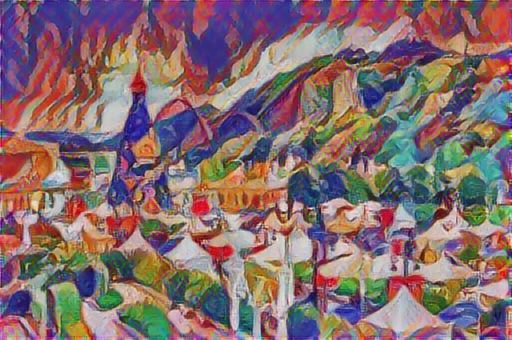

In [25]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [26]:
# 원본 만들기
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
# 225복원
x = tf.image.resize(x, (224, 224))
# 224로 resize(input 맞추기)


vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
# fully connected 가져오기
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [27]:
np.all(tf.equal(vgg(x),vgg.predict(x)))

True

In [29]:
np.argmax(vgg(x))
# 어느 부분이 가장 큰지

698

In [30]:
tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())

# 확률높은 5개

40960/35363 [==================================] - 0s 0us/step


[[('n03877845', 'palace', 0.42082825),
  ('n09332890', 'lakeside', 0.23378834),
  ('n03781244', 'monastery', 0.079879925),
  ('n03388043', 'fountain', 0.05168583),
  ('n03733281', 'maze', 0.04219263)]]

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

**위에서는 성능 확인, 이제 transfer 만들기**

In [31]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 9s 0us/step

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [32]:
# conv했던거 누적

content_layers = ['block5_conv1'] 

style_layers = ['block1_conv2',
                'block2_conv2',
                'block3_conv2', 
                'block4_conv2', 
                'block5_conv2']

# 어떤 layer를 쓰냐는 노가다..(본인 맘, 실험, NFL)
# 추상적인 부분을 대체시키는 느낌

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

- multi input, output 만들기(각 5개 적용 위해서)

- model만들 때 function으로 만들면 노가다할 때 재활용으로 좋다

In [33]:
def vgg_layers(layer_names):
  """ 중간층의 출력값을 배열로 반환하는 vgg 모델을 만듭니다."""
  # 이미지넷 데이터셋에 사전학습된 VGG 모델을 불러옵니다
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

### style 계산
**tf.linalg.einsum** : 덕분에 구현 쉬워짐

![HE](calculate_style.PNG)

- 논문구현할 때 sigma, 행렬이 있으면 einsum이 편함

In [34]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
# 4차원을 3차원 합으로
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

콘텐츠 추출

**model을 subclass하는 방식**

In [35]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()   # 생략해도 되는 부분
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False  # composition

    
    # call부분 중요
  def call(self, inputs):
    "[0,1] 사이의 실수 값을 입력으로 받습니다"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

In [36]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

### layer 학습


- 같이 최소화시키는게 어려워 학습이 잘 안되는 문제
    - 다양한 activation, loss 실험
- multi task에서의 trade-off
- CNN은 feature extract 기능, 공유되는 부분이 많아서 잘 되는 경우가 있다.


artifact 문제 : 범위 한정 방식

In [37]:
a = np.array([1,2])
tf.add(a,a)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4])>

In [39]:
tf.add_n([a,a,a,a]) # 몇 개 들어올지 몰라도 다 더해줌

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 8])>

In [70]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']
image = tf.Variable(content_image)

def clip_0_1(image):
    # gradient exploding 막기 -> gradient cliping
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
style_weight=1e-2
content_weight=1e4

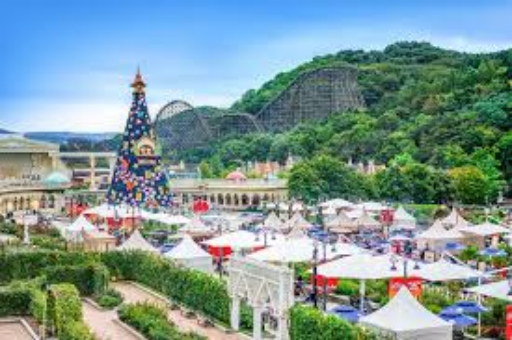

In [71]:
tensor_to_image(image)

In [45]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [68]:
@tf.function()
def train_step(image):  # 4가지 순서의 공식 + clip -> 중요
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

### tf.function

https://www.tensorflow.org/guide/function

- tensor가 있는 python 함수를 최적화시킴
- 괄호 추가 -> 옵션이 여러가지인데 첫번째 옵션만 사용
- 내부에 다양한 옵션 기능
- 마법의 은총알 아님 -> CNN처럼 계산량 많은 것은 속도 향상이 크지 않음...
- 디버깅 가능
    - 딥러닝은 디버깅이다!
    - 에러 검출부터 성능 확인까지 가능
    
- side effect
    - input에 대한 output이 아닌 것(원래 output보장)
- JIT(just in time) 기법
    - eagerly excuting 보완

In [53]:
def x(a,b):
    return a+b
x([1,2,3],[4,5,6])

[1, 2, 3, 4, 5, 6]

In [54]:
@np.vectorize
def x(a,b):
    return a+b
x([1,2,3],[4,5,6])

array([5, 7, 9])

In [56]:
@tf.function
def x(a,b):
    return a+b
y = tf.constant([1,2,3])
z = np.array([1,2,3])
x(y,y)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6])>

In [57]:
x(z,z)
# numpy나 tensor를 tensor로 연산 가능하도록

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6])>

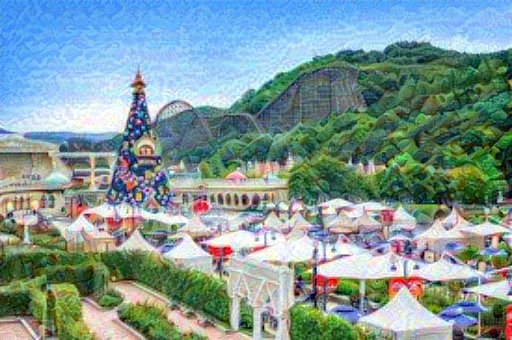

In [63]:
# tf.function 없을 경우

train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

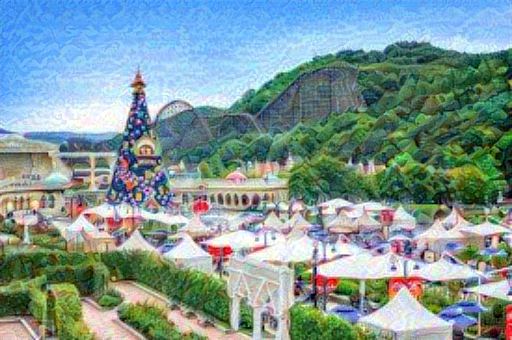

In [66]:
# tf.function 있을 경우

train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

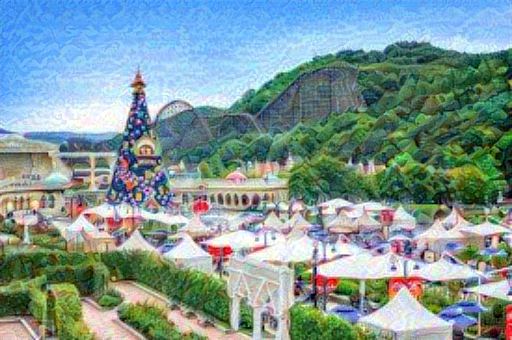

In [69]:
# tf.function()

train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)